# Access a compressed Zarr file from Zenodo

This notebook shows an example how to access a compressed Zarr published on the [https://zenodo.org](https://zenodo.org) webpage. 

### Setup
In order to run this notebook, you need to install [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo), following the [README](../README.md).

Note that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [1]:
%%time
import numpy as np
from xcube.core.store import new_data_store

CPU times: user 3.89 s, sys: 421 ms, total: 4.31 s
Wall time: 2.46 s


We initialize a new data store using the corresponding record ID, which can be found in the URL of the record: https://zenodo.org/records/11546130.

In [2]:
%%time
store = new_data_store("zenodo", root="11546130")

CPU times: user 109 ms, sys: 24.8 ms, total: 133 ms
Wall time: 131 ms


The data IDs can be streamed by executing the following cell, which are equal to the filenames in the file section.

In [3]:
store.list_data_ids()

['MergedEventStats_landonly.csv.zip',
 'EventCube_ranked_pot0.01_ne0.1.zarr.zip',
 'mergedlabels.zarr.zip']

Note that mostly zarr files are uploaded to Zenodo as a zipped archive. If no compression is applied, the data can be fetched lazily using [`zarr.storage.ZipStore`](https://zarr.readthedocs.io/en/stable/api/zarr/storage/index.html#zarr.storage.ZipStore). 

In [4]:
%%time
ds = store.open_data("EventCube_ranked_pot0.01_ne0.1.zarr.zip", chunks={})
ds

CPU times: user 1.26 s, sys: 323 ms, total: 1.58 s
Wall time: 19 s


<xarray.Dataset> Size: 111GB
Dimensions:    (latitude: 721, longitude: 1440, time: 26663)
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 213kB 1950-01-01 1950-01-02 ... 2022-12-31
Data variables:
    layer      (latitude, longitude, time) float32 111GB dask.array<chunksize=(6, 120, 5844), meta=np.ndarray>

Note that the chunking is optimized alsong the timeaxis. We therefore, plot a time series as an example. 

CPU times: user 1.24 s, sys: 271 ms, total: 1.52 s
Wall time: 19 s


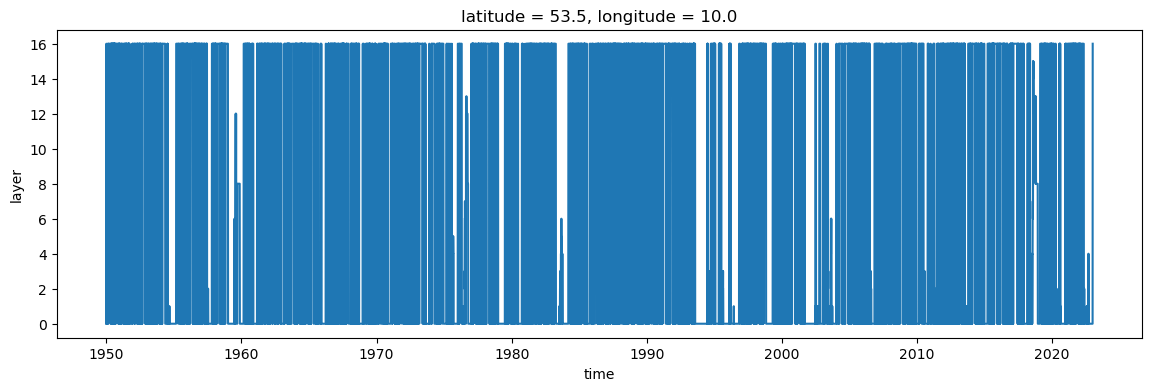

In [5]:
%%time
ds.layer.sel(latitude=53.5, longitude=10, method="nearest").plot(figsize=(14, 4))

## Access a Compressed Zarr File Without a `.zarr` Extension

For example, the record [https://zenodo.org/records/7108392](https://zenodo.org/records/7108392) publishes a compressed Zarr file where the `.zarr` extension is not explicitly part of the data ID.

However, by previewing the ZIP archive, you can see that it **contains a Zarr dataset** inside. The store can also **open this dataset lazily** as shown below.

In [6]:
%%time
store = new_data_store("zenodo", root="7108392")

CPU times: user 9.89 ms, sys: 123 μs, total: 10 ms
Wall time: 9.82 ms


The data IDs can be streamed by executing the following cell, which are equal to the filenames in the file section.

In [7]:
store.list_data_ids()

['seasfire.zip']

We can open the `"seasfire.zip"` lazily with the `open_data` method as shown below.

In [8]:
%%time
ds = store.open_data("seasfire.zip")
ds

CPU times: user 7.52 s, sys: 2.59 s, total: 10.1 s
Wall time: 1min 56s


<xarray.Dataset> Size: 152GB
Dimensions:                         (latitude: 720, longitude: 1440, time: 966)
Coordinates:
  * latitude                        (latitude) float64 6kB 89.88 ... -89.88
  * longitude                       (longitude) float64 12kB -179.9 ... 179.9
  * time                            (time) datetime64[ns] 8kB 2001-01-01 ... ...
Data variables: (12/54)
    area                            (latitude, longitude) float32 4MB dask.array<chunksize=(180, 360), meta=np.ndarray>
    cams_co2fire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    cams_frpfire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_max                (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_mean               (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    fcci_ba                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                              ...
    t2m_max                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_mean                        (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_min                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                              (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd                             (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                            (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
Attributes:
    crs:          EPSG:4326
    description:  The SeasFire Cube is a scientific datacube for seasonal fir...
    title:        SeasFire Cube: A Global Dataset for Seasonal Fire Modeling ...

As an example, we plot the wildfire carbon dioxide flux for the latest time step.

CPU times: user 4.98 s, sys: 6.06 s, total: 11 s
Wall time: 48.3 s


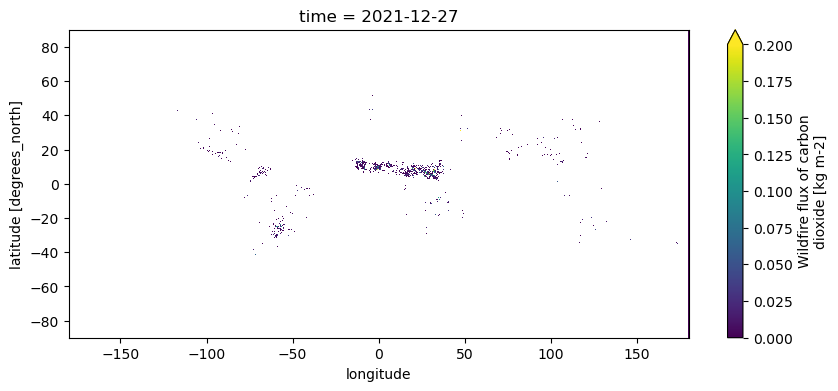

In [10]:
%%time 
ds.cams_co2fire.isel(time=-1).plot(vmin=0., vmax=0.2, figsize=(10, 4))